In [4]:
# import pandas as pd
# import mysql.connector

# # Load your large dataset
# df = pd.read_csv('names_data.csv')  # Replace with your actual DataFrame source

# # Convert DataFrame to list of tuples
# data = [tuple(row) for row in df.itertuples(index=False, name=None)]

# # Connect to MySQL
# conn = mysql.connector.connect(
#     host="localhost",
#     user="root",      # replace with your MySQL username
#     password="My$ql2024",  # replace with your MySQL password
#     database="baby_names_db"
# )
# cursor = conn.cursor()

# # Define your insert query
# insert_query = """
#     INSERT INTO names (State, Gender, Year, Name, Births)
#     VALUES (%s, %s, %s, %s, %s)
# """

# # Insert in chunks
# batch_size = 10000
# for i in range(0, len(data), batch_size):
#     cursor.executemany(insert_query, data[i:i + batch_size])
#     conn.commit()
#     print(f"Inserted rows {i} to {i + batch_size}")

# cursor.close()
# conn.close()
# print("Data upload complete.")

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import mysql.connector

# Database connection config
config = {
    'user': 'root',  # replace with your MySQL username
    'password': 'My$ql2024', # replace with your MySQL password
    'host': 'localhost',  # or remote IP
    'database': 'baby_names_db',  # replace with your database name
    'port': 3306
}

# Connect to the database
conn = mysql.connector.connect(**config)

# SQL query to run
query1 = "SELECT * FROM names"
query2 = "SELECT * FROM regions"

# Load query result into DataFrame
names = pd.read_sql(query1, con=conn)
region = pd.read_sql(query2, con=conn)

# Close connection
conn.close()

# Display the shape of DataFrames
print("Names DataFrame shape:", names.shape)
print("Region DataFrame shape:", region.shape)


d:\anaconda\envs\Deep_Learning\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Names DataFrame shape: (2212360, 5)
Region DataFrame shape: (50, 2)


In [13]:
names.head()  # Display the first few rows of the names DataFrame

,State,Gender,Year,Name,Births
0,AK,F,1980,Jennifer,114
1,AK,F,1980,Sarah,82
2,AK,F,1980,Amanda,71
3,AK,F,1980,Melissa,65
4,AK,F,1980,Michelle,61


In [14]:
region.head()  # Display the first few rows of the region DataFrame

,State,Region
0,AL,South
1,AK,Pacific
2,AZ,Mountain
3,AR,South
4,CA,Pacific


In [15]:
names.dtypes  # Display the data types of the names DataFrame

State     object
Gender    object
Year       int64
Name      object
Births     int64
dtype: object

In [16]:
region.dtypes  # Display the data types of the region DataFrame

State     object
Region    object
dtype: object

In [25]:
names.describe(include='all').T  # Get a statistical summary of the names DataFrame

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,2212360,51,CA,178427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2212360,2,F,1245103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2212360.0,NaN,NaN,NaN,1995.836395,8.644552,1980.0,1989.0,1996.0,2003.0,2009.0
Name,2212360,22240,Jordan,2935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Births,2212360.0,NaN,NaN,NaN,44.62689,144.371495,5.0,7.0,11.0,29.0,8240.0


In [26]:
region.describe(include='all').T  # Get a statistical summary of the region DataFrame

,count,unique,top,freq
State,50,50,AL,1
Region,50,7,South,16


In [17]:
names.info()  # Get a concise summary of the names DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212360 entries, 0 to 2212359
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   State   object
 1   Gender  object
 2   Year    int64 
 3   Name    object
 4   Births  int64 
dtypes: int64(2), object(3)
memory usage: 84.4+ MB


In [18]:
region.info()  # Get a concise summary of the region DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   50 non-null     object
 1   Region  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [19]:
names.isnull().sum()  # Check for missing values in the names DataFrame 

State     0
Gender    0
Year      0
Name      0
Births    0
dtype: int64

In [20]:
region.isnull().sum()  # Check for missing values in the region DataFrame

State     0
Region    0
dtype: int64

In [21]:
names.duplicated().sum()  # Check for duplicate rows in the names DataFrame

0

In [22]:
region.duplicated().sum()  # Check for duplicate rows in the region DataFrame

0

At this moment there are no issues found with datasets considering datatypes and missing records or duplicate records.

#### Objective 1: Track changes in name popularity

Your first objective is to see how the most popular names have changed over time, and also to identify the names that have jumped the most in terms of popularity.

<b>Task 1:</b> Find the overall most popular girl and boy names and show how they have changed in popularity rankings over the years

Most popular girl name overall: Jessica
Most popular boy name overall: Michael


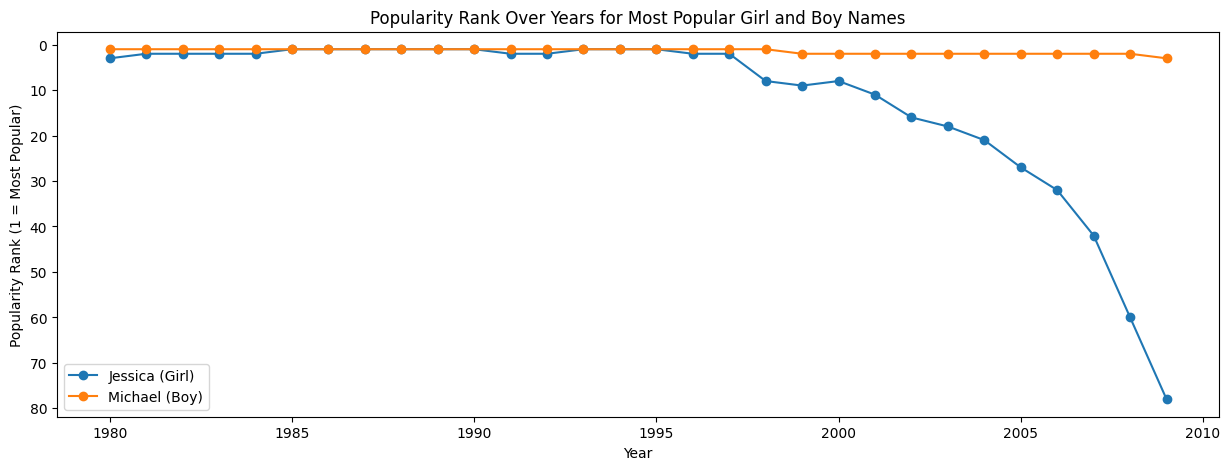

In [28]:
# Find the overall most popular girl and boy names
most_popular_girl = names[names['Gender'] == 'F'].groupby('Name')['Births'].sum().idxmax()
most_popular_boy = names[names['Gender'] == 'M'].groupby('Name')['Births'].sum().idxmax()

print(f"Most popular girl name overall: {most_popular_girl}")
print(f"Most popular boy name overall: {most_popular_boy}")

# Get yearly rankings for the most popular girl name
girl_yearly = (
    names[names['Gender'] == 'F']
    .groupby(['Year', 'Name'])['Births'].sum()
    .reset_index()
)
girl_yearly['Rank'] = girl_yearly.groupby('Year')['Births'].rank(ascending=False, method='min')
girl_popularity = girl_yearly[girl_yearly['Name'] == most_popular_girl][['Year', 'Rank', 'Births']]

# Get yearly rankings for the most popular boy name
boy_yearly = (
    names[names['Gender'] == 'M']
    .groupby(['Year', 'Name'])['Births'].sum()
    .reset_index()
)
boy_yearly['Rank'] = boy_yearly.groupby('Year')['Births'].rank(ascending=False, method='min')
boy_popularity = boy_yearly[boy_yearly['Name'] == most_popular_boy][['Year', 'Rank', 'Births']]

# Plot the ranking changes over the years
plt.figure(figsize=(15, 5))
plt.plot(girl_popularity['Year'], girl_popularity['Rank'], label=f"{most_popular_girl} (Girl)", marker='o')
plt.plot(boy_popularity['Year'], boy_popularity['Rank'], label=f"{most_popular_boy} (Boy)", marker='o')
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Popularity Rank (1 = Most Popular)')
plt.title('Popularity Rank Over Years for Most Popular Girl and Boy Names')
plt.legend()
plt.show()

In [29]:
boy_popularity

,Year,Rank,Births
1665,1980,1.0,68680
4194,1981,1.0,68765
6773,1982,1.0,68228
9400,1983,1.0,67993
12014,1984,1.0,67732
14714,1985,1.0,64899
17522,1986,1.0,64202
20429,1987,1.0,63642
23417,1988,1.0,64123
26751,1989,1.0,65381


In [30]:
girl_popularity

,Year,Rank,Births
1455,1980,3.0,33807
5166,1981,2.0,42530
8922,1982,2.0,45444
12696,1983,2.0,45281
16448,1984,2.0,45854
20299,1985,1.0,48345
24268,1986,1.0,52668
28329,1987,1.0,55988
32569,1988,1.0,51537
37040,1989,1.0,47882
